In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ad_spend.csv")
df.head()

Ad Spend ($)   Season  Revenue ($)
0           463  Monsoon          440
1           158   Winter          297
2           328  Monsoon          214
3           322  Monsoon           48
4           726   Winter         1048

In [3]:
df.shape

(200, 3)

In [4]:
g = df.groupby("Season")[['Ad Spend ($)','Revenue ($)']].mean()
g

Ad Spend ($)  Revenue ($)
Season                            
Monsoon    517.643836   423.150685
Summer     573.836066   689.360656
Winter     552.560606   826.530303

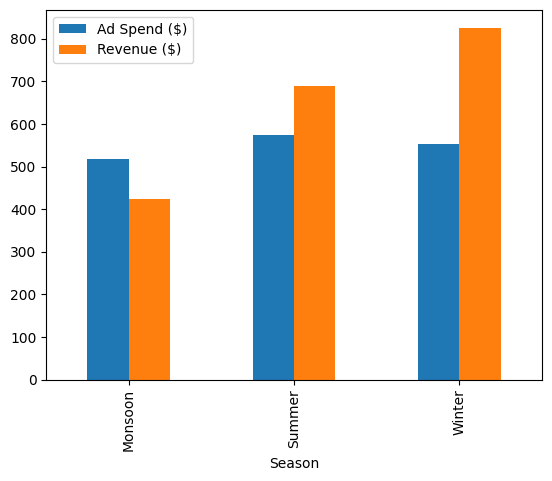

In [5]:
g.plot(kind='bar');

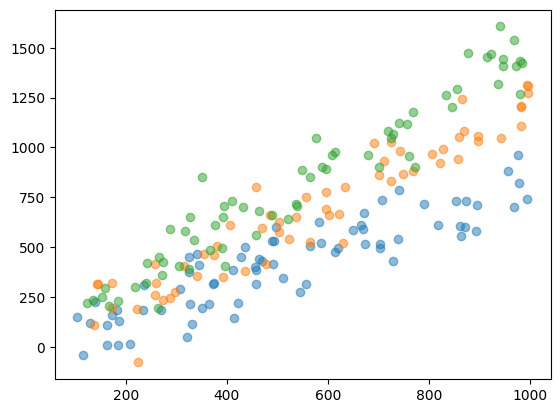

In [6]:
for season, subdf in df.groupby('Season'):
    plt.scatter(subdf['Ad Spend ($)'],subdf['Revenue ($)'],label=season,alpha = 0.5)

In [7]:
df_encoded = pd.get_dummies(df,columns=['Season'],drop_first=True)
df_encoded

Ad Spend ($)  Revenue ($)  Season_Summer  Season_Winter
0             463          440          False          False
1             158          297          False           True
2             328          214          False          False
3             322           48          False          False
4             726         1048          False           True
..            ...          ...            ...            ...
195           407          609           True          False
196           182          183          False          False
197           184           10          False          False
198           380          504           True          False
199           981         1266          False           True

[200 rows x 4 columns]

In [11]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Revenue ($)',axis=1)
y = df_encoded["Revenue ($)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8882097000477289

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9149899654766234

In [16]:
y_preds = model.predict(X_test)

evaluation = pd.DataFrame({'Actual':y_test,'Predicted':y_preds})

evaluation['% Diff'] = abs((evaluation['Predicted']-evaluation['Actual'])*100/evaluation['Actual'])

evaluation

Actual    Predicted     % Diff
59      605   834.516520  37.936615
5      1125  1043.290721   7.263047
20      699   683.827654   2.170579
198     504   445.345823  11.637734
52     1310  1161.945335  11.301883
19      320   203.377157  36.444638
162     944  1000.245120   5.958170
55      581   872.905779  50.241959
69     1446  1281.769455  11.357576
2       214   214.471812   0.220473
98      888   819.935029   7.664974
10      432   378.498649  12.384572
75     1312  1160.782024  11.525760
142     314   171.967763  45.233197
124     217   323.823037  49.227206
63     1241  1009.551607  18.650153
109     776   697.784287  10.079344
78      277   465.746966  68.139699
111    1207  1145.658982   5.082106
185    1607  1275.952900  20.600317
154     234   337.161007  44.085901
130     540   691.429280  28.042459
61      683   721.053603   5.571538
87      392   559.353388  42.692191
102     742   990.400180  33.477113
121     107    22.525515  78.948117
136     195   204.540468   4.892548
1       297   365.080469  22.922717
47      403   536.087171  33.024112
172     531   402.928178  24.118987
159     411   233.084787  43.288373
39      315   364.538918  15.726641
76      259   303.421894  17.151310
91     1456  1245.706817  14.443213
35      990   966.509104   2.372818
178    1084  1017.697881   6.116432
127     497   634.968597  27.760281
169     981   867.627678  11.556812
46      834   847.851393   1.660838
174     375   210.981880  43.738165
190    1116  1061.903695   4.847339
7      1273  1163.108646   8.632471
26     1263  1151.478634   8.829879
138     610   606.507584   0.572527
58      429   682.122792  59.002982
72      458   438.365958   4.286909
103     642   788.525635  22.823308
199    1266  1322.485336   4.461717
56      183   145.836470  20.307940
116     715   804.811987  12.561117